<a href="https://colab.research.google.com/github/m-arain/CST383Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""

@authors: Robert Meis, Mohammad Arain
@team members: Jason Contreras, Mohammad Arain
CST-383 Project: Spam vs. Ham Classifier 
References: https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
https://pandas.pydata.org/ (multiple pages)
https://scikit-learn.org/ (multiple pages)
https://seaborn.pydata.org/ (multiple pages)
https://matplotlib.org/ (multiple pages)
https://www.kite.com/python/answers/how-to-plot-a-bar-chart-using-a-dictionary-in-matplotlib-in-python
https://python-graph-gallery.com/3-control-color-of-barplots/

Spam/Ham Dataset is obtained here: https://www.kaggle.com/venky73/spam-mails-dataset
Data was downloaded on Feb 7 2021
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline

In [3]:
#df = pd.read_csv('spam_ham_dataset.csv') #keep both the .csv file and this file in the same folder or update file path
#read CSV data from a URL
df = pd.read_csv("https://raw.githubusercontent.com/m-arain/CST383Project/main/spam_ham_dataset.csv")
df0 = df; #copy df in case df gets modified incorrectly

In [4]:
#Drop Columns
df.columns = ['number', 'label', 'subject', 'label_num'] #drop 'number' (= bias) and 'label' (not needed) columns
df.drop(['number', 'label'], axis=1, inplace=True) #

In [5]:
#extract label and target vectors
X = df['subject'].str.strip('Subject: ') #X = labels vector. Strip word 'Subject: ' which appears in front of each email subject (not needed/biasing)
y = df['label_num'] #target vector

In [6]:
#weight words using tfidVectorizer for X_train and X_test
vec = TfidfVectorizer()
X = vec.fit_transform(X)
X = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [8]:
#separate X and y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
#Decision Tree Model
clf = DecisionTreeClassifier(max_depth=100, random_state=0)
clf.fit(X_train, y_train)
dt_predict = clf.predict(X_test)

In [10]:
#print Decision Tree Accuracy 
dt_accuracy = (dt_predict == y_test).mean() * 100
dt_num_correct = dt_predict[dt_predict == y_test]
print("Decision Tree Accuracy {:.2f}".format(dt_accuracy))

Decision Tree Accuracy 94.97


In [11]:
#Naive-Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)
nb_predict = clf.predict(X_test)

In [12]:
#print Naive-Bayes Accuracy
nb_accuracy = (nb_predict == y_test).mean() * 100
nb_num_correct = nb_predict[nb_predict == y_test]
print('Naive-Bayes Accuracy {:.2f}'.format(nb_accuracy))

Naive-Bayes Accuracy 86.66


In [13]:
#Random Forest Model
clf = RandomForestClassifier(max_depth = 100, min_samples_split=10, min_samples_leaf=1, random_state = 0)
clf.fit(X_train, y_train)
rf_predict = clf.predict(X_test)

In [14]:
#print Random Forest Accuracy
rf_accuracy = (rf_predict == y_test).mean() * 100
rf_num_correct = rf_predict[rf_predict == y_test]
print('Random Forest Accuracy {:.2f}'.format(rf_accuracy))

Random Forest Accuracy 97.04


Text(0.5, 1.0, 'Model Accuracy on Novel (untrained) Email Sample (n = ~1,500)')

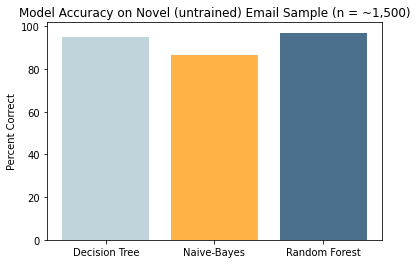

In [15]:
#Visualization
accuracies = {'Decision Tree':dt_accuracy, 'Naive-Bayes': nb_accuracy, 'Random Forest':rf_accuracy}

plt.bar(accuracies.keys(), accuracies.values(), color=('#bfd4db', '#ffb347', '#4a708b'))
plt.ylabel('Percent Correct')
plt.title('Model Accuracy on Novel (untrained) Email Sample (n = ~1,500)')

In [16]:
#Notes
'''
 kNN was tested but omitted due to limited accuracy and significant test run time
#use kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test[:50])
print(predictions, y_test[:50])
'''

'\n kNN was tested but omitted due to limited accuracy and significant test run time\n#use kNN\nknn = KNeighborsClassifier()\nknn.fit(X_train, y_train)\npredictions = knn.predict(X_test[:50])\nprint(predictions, y_test[:50])\n'